# 010: SVM

In [32]:
import sys

import matplotlib.pyplot as plt
import numpy as np

sys.path.append("../")
from metrics import f_score, auc_roc
from models import LinearSVM
from visualizations import plot_roc, plot_losses

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
train = np.load("../data/dataset_prep/train.npz")
x_train = train["x_train"]
y_train = train["y_train"]

Iteration 0, Training Loss: 1.0
Iteration 1, Training Loss: 0.9987270632938003
Iteration 2, Training Loss: 0.9974573089293663
Iteration 3, Training Loss: 0.9961907289508434
Iteration 4, Training Loss: 0.9949273154222665
Iteration 5, Training Loss: 0.9936670604275114
Iteration 6, Training Loss: 0.9924099560702431
Iteration 7, Training Loss: 0.9911559944738678
Iteration 8, Training Loss: 0.9899051677814835
Iteration 9, Training Loss: 0.9886574681558304
Iteration 10, Training Loss: 0.9874128877792412
Iteration 11, Training Loss: 0.9861714188535934
Iteration 12, Training Loss: 0.9849330536002598
Iteration 13, Training Loss: 0.9836977842600597
Iteration 14, Training Loss: 0.9824656030932098
Iteration 15, Training Loss: 0.9812365023792773
Iteration 16, Training Loss: 0.9800104744171296
Iteration 17, Training Loss: 0.9787875115248871
Iteration 18, Training Loss: 0.9775676060398754
Iteration 19, Training Loss: 0.9763507503185761
Iteration 20, Training Loss: 0.9751369367365801
Iteration 21, Tra

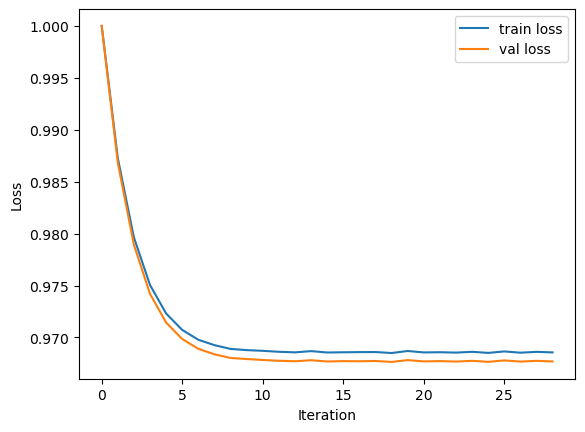

In [44]:
svm = LinearSVM()
num_samples = 10000
train_losses, val_losses = svm.hyperparameter_tuning(x_train[:num_samples], y_train[:num_samples], verbose=True)
plot_losses(train_losses[(svm._lambda, svm.lr)], val_losses[(svm._lambda, svm.lr)])
svm.train(x_train[:num_samples], y_train[:num_samples])

In [45]:
svm._lambda, svm.lr

(4.0, 0.1)

In [46]:
# predict
y_pred = svm.predict(x_train[num_samples:2*num_samples], scores=True)
print("AUC-ROC:", auc_roc(y_pred, y_train[num_samples:2*num_samples]))

AUC-ROC: 0.8268476582978502


(array([ 653., 2373., 1973., 1698., 1357.,  904.,  614.,  310.,  109.,
           9.]),
 array([0.24377926, 0.30581386, 0.36784845, 0.42988305, 0.49191765,
        0.55395225, 0.61598685, 0.67802144, 0.74005604, 0.80209064,
        0.86412524]),
 <BarContainer object of 10 artists>)

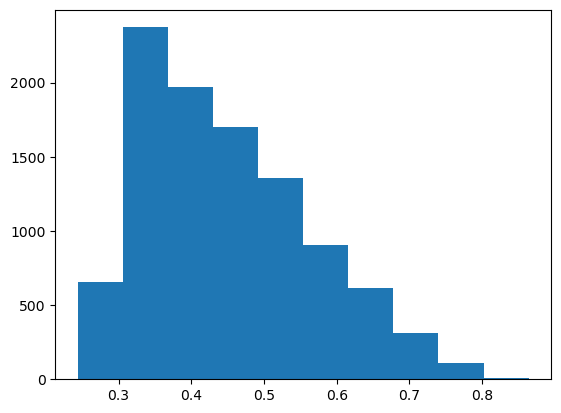

In [47]:
plt.hist(y_pred)

Threshold: 0.00, F1 Score: 0.1565
Threshold: 0.01, F1 Score: 0.1565
Threshold: 0.02, F1 Score: 0.1565
Threshold: 0.03, F1 Score: 0.1565
Threshold: 0.04, F1 Score: 0.1565
Threshold: 0.05, F1 Score: 0.1565
Threshold: 0.06, F1 Score: 0.1565
Threshold: 0.07, F1 Score: 0.1565
Threshold: 0.08, F1 Score: 0.1565
Threshold: 0.09, F1 Score: 0.1565
Threshold: 0.10, F1 Score: 0.1565
Threshold: 0.11, F1 Score: 0.1565
Threshold: 0.12, F1 Score: 0.1565
Threshold: 0.13, F1 Score: 0.1565
Threshold: 0.14, F1 Score: 0.1565
Threshold: 0.15, F1 Score: 0.1565
Threshold: 0.16, F1 Score: 0.1565
Threshold: 0.17, F1 Score: 0.1565
Threshold: 0.18, F1 Score: 0.1565
Threshold: 0.19, F1 Score: 0.1565
Threshold: 0.20, F1 Score: 0.1565
Threshold: 0.21, F1 Score: 0.1565
Threshold: 0.22, F1 Score: 0.1565
Threshold: 0.23, F1 Score: 0.1565
Threshold: 0.24, F1 Score: 0.1565
Threshold: 0.25, F1 Score: 0.1565
Threshold: 0.26, F1 Score: 0.1567
Threshold: 0.27, F1 Score: 0.1571
Threshold: 0.28, F1 Score: 0.1585
Threshold: 0.2

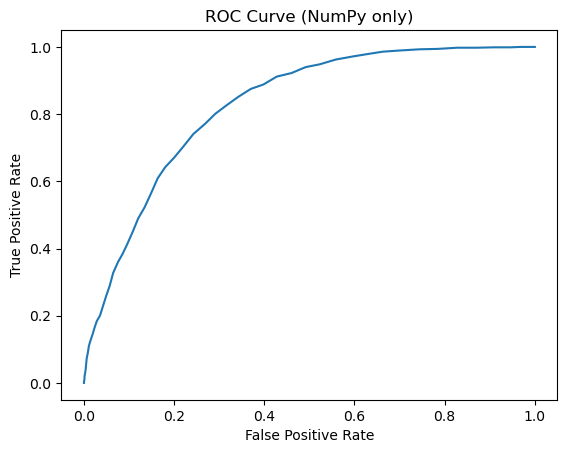

In [48]:
plot_roc(y_pred, y_train[num_samples:2*num_samples], )

In [30]:
y_pred = svm.predict(x_train[num_samples:2*num_samples])
print("F1 Score:", f_score(y_pred, y_train[num_samples:2*num_samples]))

F1 Score: 0.3661413856853596
